In [9]:
import pandas as pd
import matplotlib.pyplot as plt

file = pd.read_csv('C:/Users/shant/OneDrive/Desktop/minor/DATASETS/consumption/household_power_consumption.csv')

In [10]:
sub_metering_3_mean = data['Sub_metering_3'].mean()
file['Sub_metering_3'].fillna(sub_metering_3_mean, inplace=True)

C:\Users\shant\AppData\Local\Temp\ipykernel_23008\2439190004.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  file['Sub_metering_3'].fillna(sub_metering_3_mean, inplace=True)


In [11]:
numeric_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']

for col in numeric_cols:
    file[col] = pd.to_numeric(file[col], errors='coerce')
    col_mean = file[col].mean()
    file[col].fillna(col_mean, inplace=True)

file['Date'] = pd.to_datetime(file['Date'])


C:\Users\shant\AppData\Local\Temp\ipykernel_23008\3304718773.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  file[col].fillna(col_mean, inplace=True)
C:\Users\shant\AppData\Local\Temp\ipykernel_23008\3304718773.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  file['Date'] = pd.to_datetime(file['Date'])


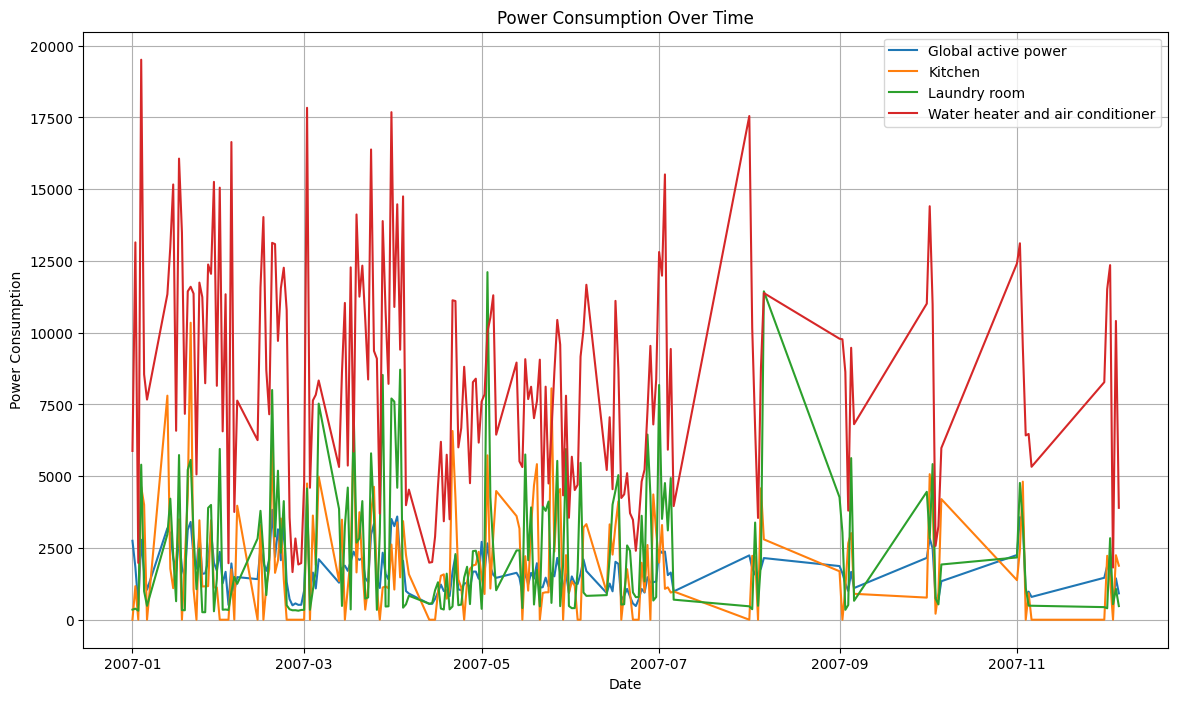

In [12]:
grouped_file = file.groupby('Date')[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].sum()

plt.figure(figsize=(14, 8))

plt.plot(grouped_file.index, grouped_file['Global_active_power'], label='Global active power')
plt.plot(grouped_file.index, grouped_file['Sub_metering_1'], label='Kitchen')
plt.plot(grouped_file.index, grouped_file['Sub_metering_2'], label='Laundry room')
plt.plot(grouped_file.index, grouped_file['Sub_metering_3'], label='Water heater and air conditioner')

plt.xlabel('Date')
plt.ylabel('Power Consumption')
plt.title('Power Consumption Over Time')
plt.legend()
plt.grid(True)

plt.show()

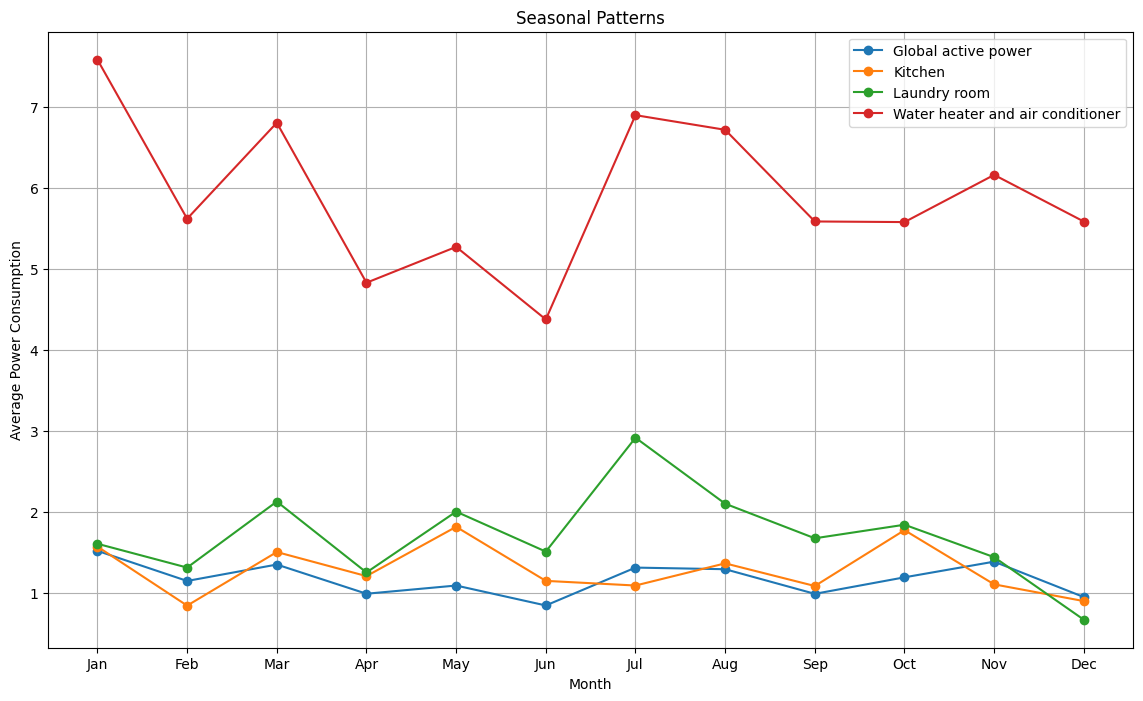

In [13]:
file['Month'] = file['Date'].dt.month
monthly_file = file.groupby('Month')[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()

plt.figure(figsize=(14, 8))

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(months, monthly_file['Global_active_power'], marker='o', label='Global active power')
plt.plot(months, monthly_file['Sub_metering_1'], marker='o', label='Kitchen')
plt.plot(months, monthly_file['Sub_metering_2'], marker='o', label='Laundry room')
plt.plot(months, monthly_file['Sub_metering_3'], marker='o', label='Water heater and air conditioner')

plt.xlabel('Month')
plt.ylabel('Average Power Consumption')
plt.title('Seasonal Patterns')
plt.legend()
plt.grid(True)

plt.show()

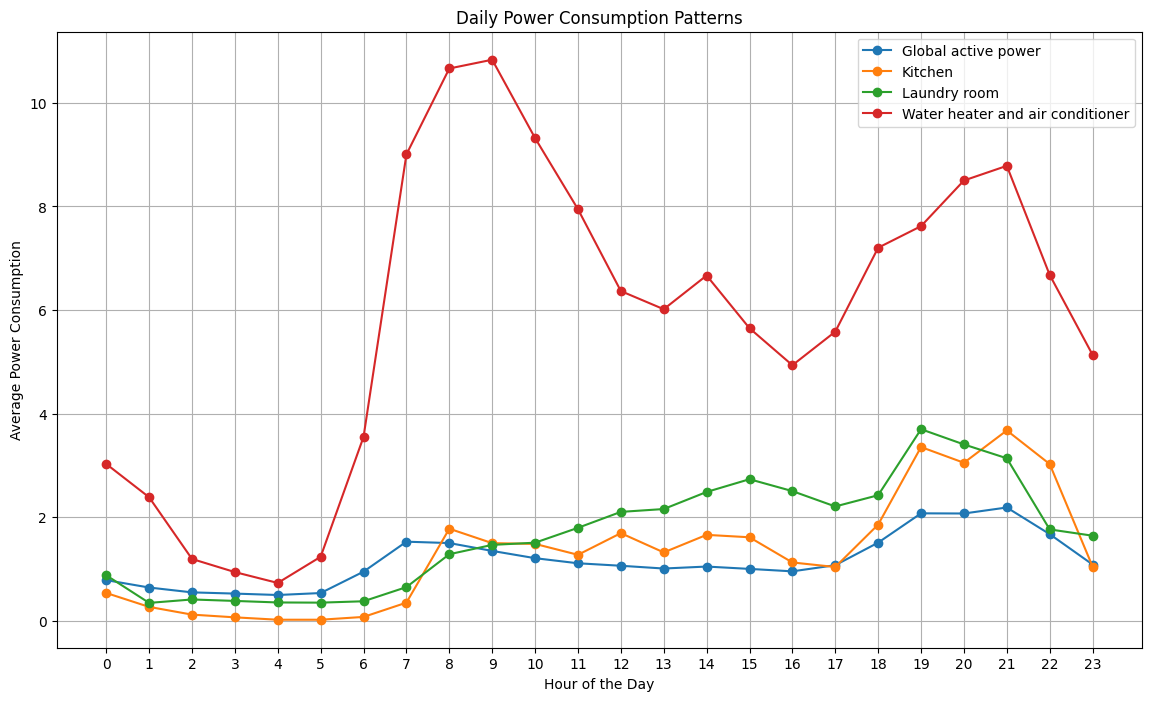

In [14]:
file['Hour'] = pd.to_datetime(file['Time'], format='%H:%M:%S').dt.hour
daily_file = file.groupby('Hour')[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()

plt.figure(figsize=(14, 8))
hours = list(range(0, 24))

plt.plot(hours, daily_file['Global_active_power'], marker='o', label='Global active power')
plt.plot(hours, daily_file['Sub_metering_1'], marker='o', label='Kitchen')
plt.plot(hours, daily_file['Sub_metering_2'], marker='o', label='Laundry room')
plt.plot(hours, daily_file['Sub_metering_3'], marker='o', label='Water heater and air conditioner')

plt.xlabel('Hour of the Day')
plt.ylabel('Average Power Consumption')
plt.title('Daily Power Consumption Patterns')
plt.xticks(hours)
plt.legend()
plt.grid(True)

plt.show()